In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('training.csv')
dftest = pd.read_csv('testing.csv')

In [3]:
target_column_name = 'class'
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

X_train = df.drop(target_column_name, axis=1)
y_train = df[target_column_name]

X_test = dftest.drop(target_column_name, axis= 1)
y_test = dftest['class']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k=1, CV Mean Accuracy: 0.7431
k=2, CV Mean Accuracy: 0.7729
k=3, CV Mean Accuracy: 0.7679
k=4, CV Mean Accuracy: 0.7622
k=5, CV Mean Accuracy: 0.7918
k=6, CV Mean Accuracy: 0.7742
k=7, CV Mean Accuracy: 0.7742
k=8, CV Mean Accuracy: 0.7679
k=9, CV Mean Accuracy: 0.7918
k=10, CV Mean Accuracy: 0.7738
k=11, CV Mean Accuracy: 0.7799
k=12, CV Mean Accuracy: 0.7677
k=13, CV Mean Accuracy: 0.7619
k=14, CV Mean Accuracy: 0.7558
k=15, CV Mean Accuracy: 0.7383
k=16, CV Mean Accuracy: 0.7439
k=17, CV Mean Accuracy: 0.7501
k=18, CV Mean Accuracy: 0.7378
k=19, CV Mean Accuracy: 0.7201
k=20, CV Mean Accuracy: 0.7082

Best k based on cross-validation: 5 with CV accuracy: 0.7918


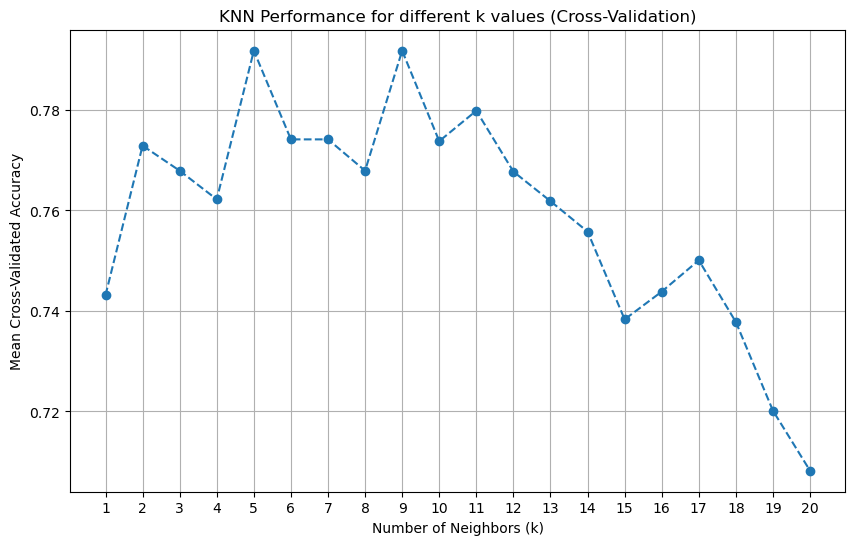

In [4]:
k_range = range(1, 21) # Test k values from 1 to 30 (adjust as needed)
cv_scores = [] # To store cross-validation scores for each k

for k_val in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    # Perform 5-fold cross-validation (cv=5)
    # 'accuracy' is a common scoring metric. For imbalanced data, consider 'f1_macro', 'f1_weighted', etc.
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"k={k_val}, CV Mean Accuracy: {scores.mean():.4f}")

best_k_cv = k_range[np.argmax(cv_scores)]
print(f"\nBest k based on cross-validation: {best_k_cv} with CV accuracy: {max(cv_scores):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed')
plt.title('KNN Performance for different k values (Cross-Validation)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy (k={k}): {accuracy:.4f}")

# Optional: Print more detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


KNN Model Accuracy (k=5): 0.7239

Classification Report:
              precision    recall  f1-score   support

    asphalt        0.76      0.71      0.74        45
   building        0.86      0.67      0.75        97
        car        0.94      0.81      0.87        21
   concrete        0.72      0.82      0.76        93
      grass        0.65      0.71      0.68        83
       pool        0.79      0.79      0.79        14
     shadow        0.70      0.69      0.70        45
       soil        0.25      0.35      0.29        20
       tree        0.78      0.78      0.78        89

    accuracy                           0.72       507
   macro avg       0.72      0.70      0.71       507
weighted avg       0.74      0.72      0.73       507



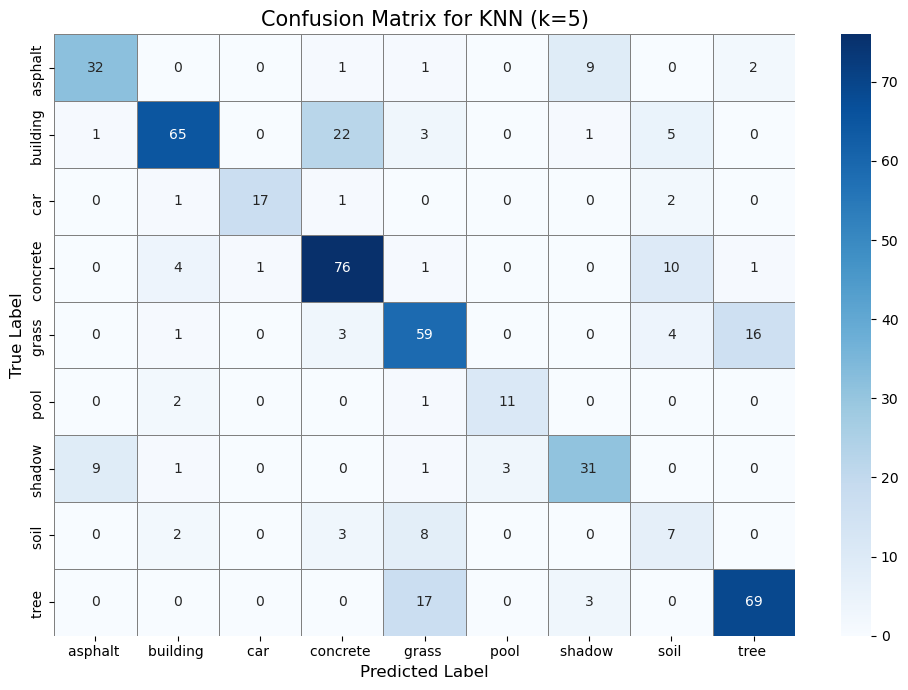

In [12]:
class_labels = np.unique(np.concatenate((y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred, labels=class_labels)

cm_df = pd.DataFrame(cm,
                     index = class_labels,
                     columns = class_labels)

plt.figure(figsize=(10, 7)) # Adjust figure size
sns.heatmap(cm_df,
            annot=True,      # Display the numbers in each cell
            fmt='d',         # Format numbers as integers
            cmap='Blues',    # Colormap
            linewidths=.5,
            linecolor='gray',
            cbar=True)

plt.title(f'Confusion Matrix for KNN (k={best_k_cv})', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
# plt.xticks(rotation=45, ha='right') # Uncomment if class names are long
# plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
